# Simulación y Optimización de Portafolios de ETFs 

## Presentación PAP, avance

Luisa Fernanda Aguilar, if694948

*Alumna, Ingeniería Financiera*

PAP Conformación de portafolios de inversión para economías
familiares y desarrollo de alternativas de micro inversión eficientes



# 1. Introducción

A continuación se presenta la metodología para la creación de un portafolio conformado con ETFs, a lo largo del semestre Otoño 2017, en el Proyecto de Apreciación Profesional de Conformación de portafolios de inversión para economías familiares y desarrollo de alternativas de micro inversión eficientes.A lo largo del cuaderno, se explicará la metodología para la elección de los activos que conformarán el portafolio, así como las medidas en cuestión para la elección del mismo.

# 2. Marco Teórico


### ETF

Un fondo cotizado (ETF por sus siglas en inglés) es un conjunto diversificado de activos(como un fondo de inversión) que cotiza en bolsa (como una acción). Los ETFS son una forma sencilla, económica y eficiente en costes de invertir. 

### Ventajas de Invertir en ETFs

El precio, la comodidad y la variedad son algunas de las razones por las que los inversores deberían considerar utilizar fondos cotizados (ETFs) en sus carteras.

+ **Flexibilidad**: La variedad de exposiciones disponibles hacen de los ETFS un instrumento válido tanto para el núcleo de la cartera como para inversiones más tácticas.

+ **Eficientes en costes**: Los ETFs suelen tener menos comisiones de gestión que los fondos y los costes son fáciles de calcular.

+ **Diversificación**: Los ETFs ofrecen de forma instantánea una fuente de exposición a la rentabilidad de distintos valores.

+ **Transparencia**: Los ETFs muestran cada valor contenido en el fondo para que sepa exactamente en lo que está invertido.

+ **Liquidez**: Los ETFs cotizan en bolsa y pueden negociarse en cualquier momento durante el horario de mercado.

+ **Acceso**: Los ETFs permiten acceso inmediato a mercados internacionales.


En la actualidad, el sector de ETFs mueve 4 billones de dólares estadounidenses

### Cómo elegir un ETF

Dado el gran número de ETFs disponibles para las distintas clases de activos, estilos de inversión, geografías y sectores, hay muchos aspectos que tener en cuenta antes de invertir. Dependiendo del objetivo a realizar será la elección de éstos.

Entre los principales objetivos de los ETFs se encuentran:

+ Aumentar el patrimonio a largo plazo

+ Generar rentas

+ Beneficiarse de los movimientos a corto plazo

+ **Exposición** : Encuentre un ETF que replique un índice para reflejar su estrategia de inversión

+ **Precio** : ¿Cuánto está dispuesto a pagar para replicar el índice que ha seleccionado?

+ **Estructura**: Asegúrate de conocer la estructura de tu ETF que puede ser de replica física o sintética
















### Los tres grandes

El mercado global de ETFs está dominado por tres grandes compañías: BlackRock Inc.'s (NYSE: BLK
BlackRock Inc BLK 462.45-0.17%) iShares, Vanguard's ETFs y State Street Global Advisors’ (SSgA) SPDR ETFs. Para Mayo de 2016, alrededor del 70% del mercado global de ETF y activos ETP eran administrados por estas compañías. Ningun otro proveedor llega si quiera al 3.5% del mercado global.

# 3. Metodología 


### 3.1 Instalación de Paquetes

En primer lugar, para poder bajar precios y información sobre opciones de Yahoo, es necesario cargar algunos paquetes de Python. En este caso, el paquete principal será Pandas. También, se usarán el Scipy y el Numpy para las matemáticas necesarias y, el Matplotlib y el Seaborn para hacer gráficos de las series de datos. Finalmente, se usará el paquete **cvxopt** para optimización convexa, para instalar ingrese en terminal la instrucción: *conda install -c anaconda cvxopt*



In [1]:
#importar los paquetes que se van a usar
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import scipy.stats as stats
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.covariance as skcov
import scipy.cluster.hierarchy as hac
import cvxopt as opt
from cvxopt import blas, solvers
solvers.options['show_progress'] = False
%matplotlib inline
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)
#Funciones para portafolios
import portfolio_func

##importar los paquetes que se van a usar
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import scipy.stats as stats
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.covariance as skcov
import numpy as np
from sklearn.cluster import KMeans

import cvxopt as opt
from cvxopt import blas, solvers
solvers.options['show_progress'] = False
%matplotlib inline
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 11)
pd.set_option('display.max_rows', 170)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)
#Funciones para portafolios
import portfolio_func

Una vez cargados los paquetes, es necesario definir los tickers de las acciones que se usarán, la fuente de descarga (Yahoo en este caso, pero también se puede desde Google) y las fechas de interés. Con esto, la función *DataReader* del paquete *pandas_datareader* bajará los precios solicitados.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte. El siguiente comando instala el paquete en Anaconda:
*conda install -c conda-forge pandas-datareader *


### 3.2 Selección de Activos

Para la elección de los activos a conformar el portafolio, se utilizaron ETFs de Blackrock y Vanguard. De cada una de esas compañías, se eligió un ETF por sector, basándose en el rendmiento de los mismos. Las industrias de los fondos son las siguientes:

+ Sector de Energía
+ Sector de Salud
+ Sector Industrial
+ Sector de Telecomunicaciones
+ Sector de Materiales
+ Sector Financiero
+ Sector Industrial
+ Sector de Tecnologías de la Información

Se trabajó con 21 ETFs, 11 pertenecientes a Vanguard y 10 de Blackrock. Se analizó cada uno de los fondos, calculando los rendimientos de cada uno de ellos, así como su riesgo. Se utilizó una matriz de correlación para la selección de activos. Entre aquellos fondos que contaban con correlación alta, se eligió aquel con el mayor rendimiento.


Se crea una función para descargar los daos desde Yahoo

In [2]:
def get_historical_closes(ticker, start_date, end_date):
    p = web.DataReader(ticker, "yahoo", start_date, end_date).sort_index('major_axis')
    d = p.to_frame()['Adj Close'].reset_index()
    d.rename(columns={'minor': 'Ticker', 'Adj Close': 'Close'}, inplace=True)
    pivoted = d.pivot(index='Date', columns='Ticker')
    pivoted.columns = pivoted.columns.droplevel(0)
    return pivoted

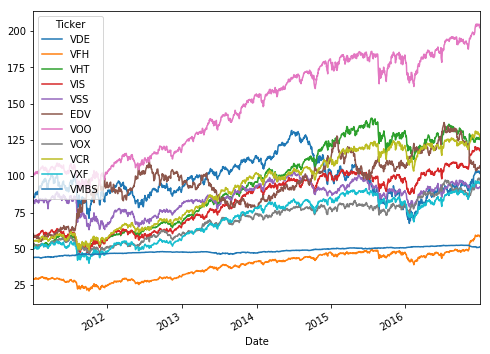

In [3]:
data=get_historical_closes(['VDE','VFH','VHT','VIS','VSS','EDV','VOO','VOX','VCR','VXF','VMBS','^GSPC'], '2011-01-01', '2016-12-31')
closes=data[['VDE','VFH','VHT','VIS','VSS','EDV','VOO','VOX','VCR','VXF','VMBS']]
sp=data[['^GSPC']]
closes.plot(figsize=(8,6));

Formulando el Riesgo del Portafolio y Calculo de Retornos diarios. Posteriormente, con los rendimientos se hace un cálculo de correlación entre los activos.

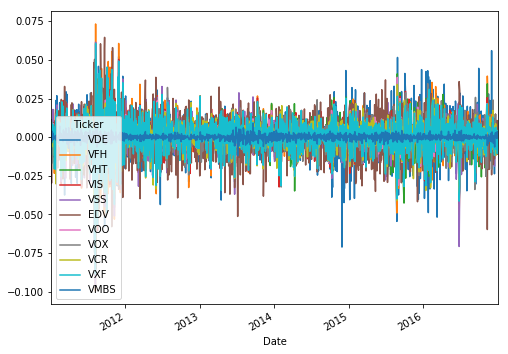

In [4]:
def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1))[1:]
daily_returns=calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6));

In [5]:
daily_returns.corr()

Ticker,VDE,VFH,VHT,VIS,VSS,EDV,VOO,VOX,VCR,VXF,VMBS
Ticker,,,,,,,,,,,
VDE,1.000,0.726,0.623,0.772,0.771,-0.460,0.801,0.623,0.695,0.784,-0.164
VFH,0.726,1.000,0.774,0.896,0.811,-0.546,0.920,0.745,0.854,0.904,-0.215
VHT,0.623,0.774,1.000,0.794,0.713,-0.425,0.870,0.687,0.806,0.835,-0.167
VIS,0.772,0.896,0.794,1.000,0.841,-0.531,0.946,0.764,0.899,0.939,-0.200
VSS,0.771,0.811,0.713,0.841,1.000,-0.464,0.865,0.717,0.802,0.847,-0.106
EDV,-0.460,-0.546,-0.425,-0.531,-0.464,1.000,-0.525,-0.362,-0.493,-0.498,0.531
VOO,0.801,0.920,0.870,0.946,0.865,-0.525,1.000,0.802,0.932,0.940,-0.190
VOX,0.623,0.745,0.687,0.764,0.717,-0.362,0.802,1.000,0.757,0.788,-0.122
VCR,0.695,0.854,0.806,0.899,0.802,-0.493,0.932,0.757,1.000,0.924,-0.187


Como los rendimientos calculados anteriormente son diarios, se anualizan y reagrupan.

In [6]:
def calc_annual_returns(daily_returns):
    grouped = np.exp(daily_returns.groupby(lambda date: date.year).sum())-1
    return grouped
annual_returns = calc_annual_returns(daily_returns)
annual_returns

Ticker,VDE,VFH,VHT,VIS,VSS,EDV,VOO,VOX,VCR,VXF,VMBS
2011,0.019,-0.161,0.095,-0.031,-2.022e-01,0.587,0.010,-0.036,0.024,-0.051,0.058
2012,0.034,0.262,0.190,0.171,2.074e-01,0.024,0.160,0.166,0.246,0.186,0.023
2013,0.258,0.328,0.427,0.419,1.658e-01,-0.207,0.324,0.243,0.437,0.383,-0.013
2014,-0.099,0.141,0.255,0.085,-5.056e-02,0.435,0.136,0.040,0.095,0.076,0.059
2015,-0.232,-0.006,0.071,-0.035,-1.345e-05,-0.057,0.013,0.027,0.063,-0.033,0.016
2016,0.292,0.249,-0.032,0.204,4.240e-02,0.016,0.122,0.228,0.067,0.162,0.013


Sin optimizar, se calcula el VaR y el Sharpe Ratio para el portafolio formado por todos los activos.

In [7]:
def calc_portfolio_var(returns, weights=None):
    if (weights is None):
        weights = np.ones(returns.columns.size)/returns.columns.size
    sigma = np.cov(returns.T,ddof=0)
    var = (weights * sigma * weights.T).sum()
    return var
calc_portfolio_var(annual_returns)

0.0073970974166837995

In [8]:
def sharpe_ratio(returns, weights = None, risk_free_rate = 0.0131):
    n = returns.columns.size
    if weights is None: weights = np.ones(n)/n
    var = calc_portfolio_var(returns, weights)
    means = returns.mean()
    return (means.dot(weights) - risk_free_rate)/np.sqrt(var)
sharpe_ratio(annual_returns)

1.0994693158606721

Se deben seleccionar determinados ETFs entre todo el grupo, aquellos que harán que el sharpe ratio aumente, cuidando el riesgo. Se seleccionan los calculos ya realizados de los ETFs, y se acomodan de manera vertical para que sea más fácil la comparación. La decisión se basará en rendimientos, desviación y correlación entre activos.

In [9]:
#Selección de activos

daily_returns_mean=daily_returns.mean()
daily_returns_mean

Ticker
VDE     1.120e-04
VFH     4.566e-04
VHT     5.858e-04
VIS     4.692e-04
VSS     7.001e-05
EDV     3.791e-04
VOO     4.596e-04
VOX     4.009e-04
VCR     5.454e-04
VXF     4.187e-04
VMBS    1.004e-04
dtype: float64

In [10]:
daily_returns_std=daily_returns.std()
daily_returns_std

Ticker
VDE     0.015
VFH     0.012
VHT     0.010
VIS     0.011
VSS     0.011
EDV     0.014
VOO     0.009
VOX     0.010
VCR     0.010
VXF     0.012
VMBS    0.002
dtype: float64

In [11]:
daily_returns_ms=pd.concat([daily_returns_mean, daily_returns_std], axis=1)
daily_returns_ms

,0,1
Ticker,,
VDE,1.120e-04,0.015
VFH,4.566e-04,0.012
VHT,5.858e-04,0.010
VIS,4.692e-04,0.011
VSS,7.001e-05,0.011
EDV,3.791e-04,0.014
VOO,4.596e-04,0.009
VOX,4.009e-04,0.010
VCR,5.454e-04,0.010


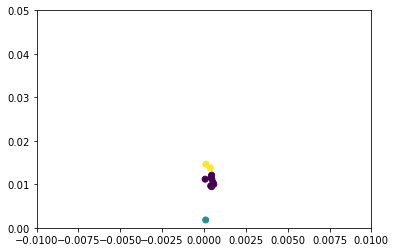

In [12]:
random_state = 10
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(daily_returns_ms)
plt.scatter(daily_returns_mean, daily_returns_std, c=y_pred);
plt.axis([-0.01, 0.01, 0, 0.05]);

In [13]:
corr_mat=daily_returns.corr(method='spearman')
corr_mat

Ticker,VDE,VFH,VHT,VIS,VSS,EDV,VOO,VOX,VCR,VXF,VMBS
Ticker,,,,,,,,,,,
VDE,1.000,0.669,0.568,0.729,0.725,-0.411,0.764,0.558,0.634,0.738,-0.169
VFH,0.669,1.000,0.722,0.855,0.744,-0.475,0.891,0.675,0.805,0.862,-0.238
VHT,0.568,0.722,1.000,0.743,0.652,-0.368,0.836,0.617,0.746,0.795,-0.181
VIS,0.729,0.855,0.743,1.000,0.784,-0.453,0.923,0.696,0.856,0.914,-0.217
VSS,0.725,0.744,0.652,0.784,1.000,-0.387,0.818,0.643,0.732,0.784,-0.128
EDV,-0.411,-0.475,-0.368,-0.453,-0.387,1.000,-0.462,-0.302,-0.424,-0.421,0.551
VOO,0.764,0.891,0.836,0.923,0.818,-0.462,1.000,0.737,0.896,0.915,-0.206
VOX,0.558,0.675,0.617,0.696,0.643,-0.302,0.737,1.000,0.684,0.725,-0.138
VCR,0.634,0.805,0.746,0.856,0.732,-0.424,0.896,0.684,1.000,0.887,-0.202


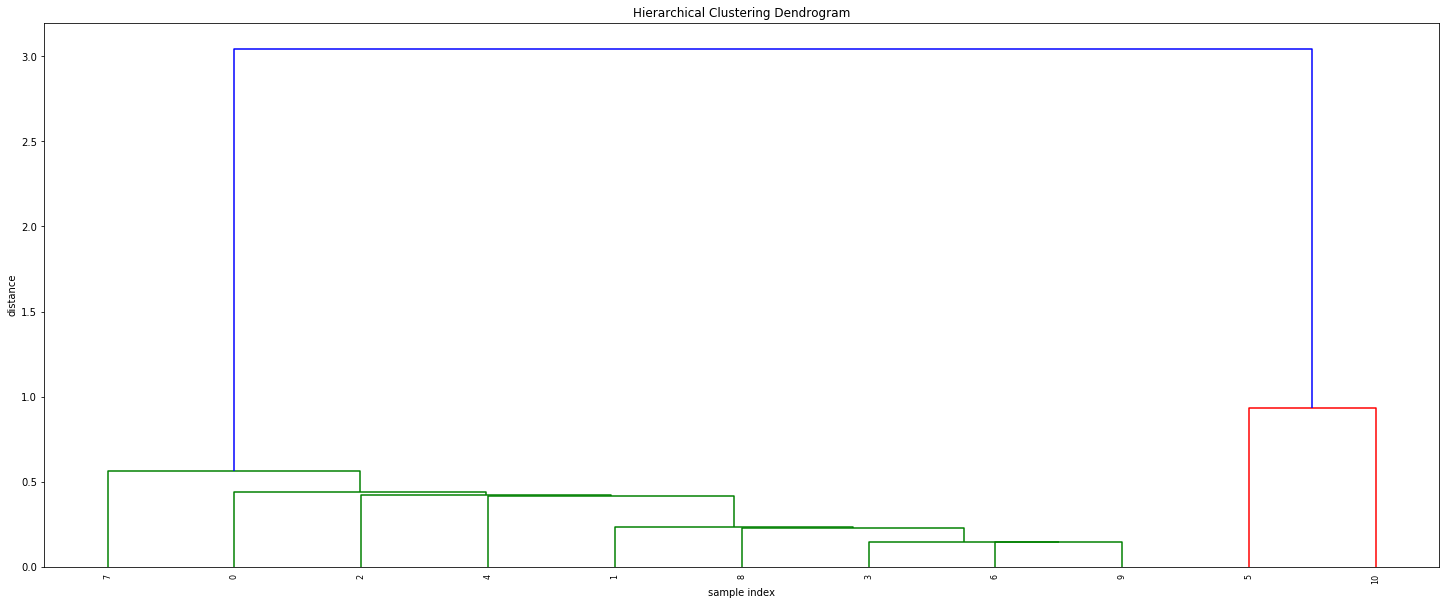

In [14]:
Z = hac.linkage(corr_mat, 'single')

# Plot the dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

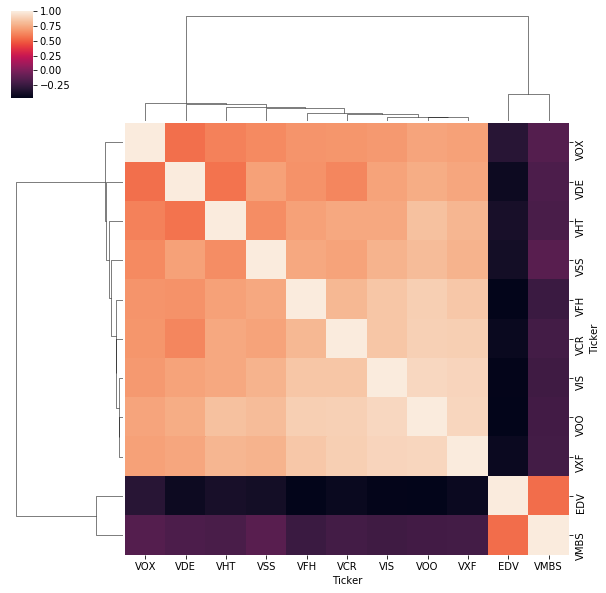

In [15]:
g = sns.clustermap(corr_mat, robust=True)

In [16]:
daily_returns.corr().stack().sort_values(axis=0, ascending=True, kind='quicksort')

Ticker  Ticker
EDV     VFH      -0.546
VFH     EDV      -0.546
VIS     EDV      -0.531
EDV     VIS      -0.531
VOO     EDV      -0.525
EDV     VOO      -0.525
VXF     EDV      -0.498
EDV     VXF      -0.498
VCR     EDV      -0.493
EDV     VCR      -0.493
VSS     EDV      -0.464
EDV     VSS      -0.464
        VDE      -0.460
VDE     EDV      -0.460
VHT     EDV      -0.425
EDV     VHT      -0.425
        VOX      -0.362
VOX     EDV      -0.362
VFH     VMBS     -0.215
VMBS    VFH      -0.215
        VIS      -0.200
VIS     VMBS     -0.200
VOO     VMBS     -0.190
VMBS    VOO      -0.190
        VCR      -0.187
VCR     VMBS     -0.187
VMBS    VXF      -0.180
VXF     VMBS     -0.180
VMBS    VHT      -0.167
VHT     VMBS     -0.167
VMBS    VDE      -0.164
VDE     VMBS     -0.164
VOX     VMBS     -0.122
VMBS    VOX      -0.122
        VSS      -0.106
VSS     VMBS     -0.106
VMBS    EDV       0.531
EDV     VMBS      0.531
VDE     VOX       0.623
VOX     VDE       0.623
VHT     VDE       0.623
V

Al comparar los activos más correlacionados y elegir entre ellos los de mayor rendimiento, quedan los siguientes ETFs: 'VOX','EDV','VHT','VFH'. Todos pertenecen a Vanguard. Se repite la metodología para los fondos de Blackrock, siendo seleccionados los siguientes: 'IYF','IHI','REM','IYR','IVV'.

### 3.3 Formulación del riesgo de un portafolio y simulación Montecarlo

Al tener los activos seleccionados, se crea el portafolio nuevo. Se incorporará un Bono del tesoro para diversificar el portafolio.



In [17]:
assets = ['IYF','IHI','REM','IYR','IVV','VOX','EDV','VHT','VFH']
closes = portfolio_func.get_historical_closes(assets, '2016-01-01', '2017-09-22')

In [18]:
daily_returns=portfolio_func.calc_daily_returns(closes)

In [19]:
r =0.0131/252
results_frame = portfolio_func.sim_mont_portfolio(daily_returns,100000,r)

/Users/fernandaaguilar/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
#Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe'].idxmax()]
#Menor SD
min_vol_port = results_frame.iloc[results_frame['SD'].idxmin()]


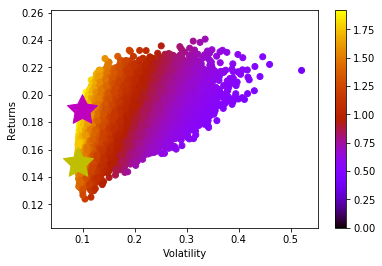

In [21]:
plt.scatter(results_frame.SD,results_frame.Returns,c=results_frame.Sharpe,cmap='gnuplot')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='m',s=1000);
#Menor SD
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='y',s=1000);

In [22]:
pd.DataFrame(max_sharpe_port)

,96276
Returns,0.189
SD,0.098
Sharpe,1.919
EDV,0.232
IHI,0.276
IVV,0.116
IYF,0.109
IYR,0.002
REM,0.003
VFH,0.175


In [23]:
pd.DataFrame(min_vol_port)

,998
Returns,0.150
SD,0.090
Sharpe,1.663
EDV,0.274
IHI,0.081
IVV,0.157
IYF,0.082
IYR,0.045
REM,0.006
VFH,0.098


### 3.4 Optimización de portafolios

In [24]:
daily_returns=portfolio_func.calc_daily_returns(closes)

In [25]:
N=10000
results_frame_optim = portfolio_func.optimal_portfolio(daily_returns,N,r)

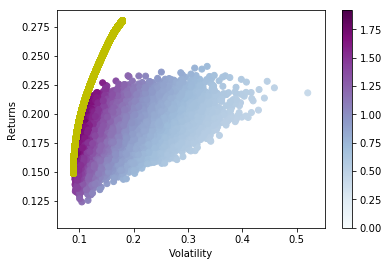

In [26]:
#Montecarlo
plt.scatter(results_frame.SD,results_frame.Returns,c=results_frame.Sharpe,cmap='BuPu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#Markowitz
plt.plot(results_frame_optim.SD, results_frame_optim.Returns,'b-o', color='y');

In [27]:
#Sharpe Ratio
max_sharpe_port_optim = results_frame_optim.iloc[results_frame_optim['Sharpe'].idxmax()]
#Menor SD
min_vol_port_optim = results_frame_optim.iloc[results_frame_optim['SD'].idxmin()]

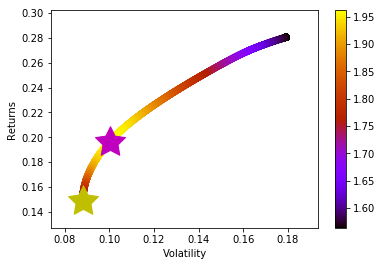

In [28]:
#Markowitz
plt.scatter(results_frame_optim.SD,results_frame_optim.Returns,c=results_frame_optim.Sharpe,cmap='gnuplot');
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#Sharpe Ratio
plt.scatter(max_sharpe_port_optim[1],max_sharpe_port_optim[0],marker=(5,1,0),color='m',s=1000);
#SD
plt.scatter(min_vol_port_optim[1],min_vol_port_optim[0],marker=(5,1,0),color='y',s=1000);

In [29]:
pd.DataFrame(max_sharpe_port_optim)

,4588
Returns,1.965e-01
SD,1.001e-01
Sharpe,1.962e+00
EDV,2.327e-01
IHI,3.246e-01
IVV,1.586e-01
IYF,1.042e-01
IYR,1.433e-02
REM,6.967e-05
VFH,1.653e-01


In [30]:
pd.DataFrame(min_vol_port_optim)

,9999
Returns,1.489e-01
SD,8.804e-02
Sharpe,1.691e+00
EDV,3.123e-01
IHI,6.971e-02
IVV,1.445e-01
IYF,9.365e-02
IYR,6.418e-02
REM,1.329e-08
VFH,1.223e-01


## Inclusión de un bono

In [31]:
daily_returns=portfolio_func.calc_daily_returns(closes)

In [32]:
results_frame_optim_b = portfolio_func.optimal_portfolio_b(daily_returns,10000,r,(0.0131/252))

In [33]:
#Sharpe Ratio
max_sharpe_port_optim_b = results_frame_optim_b.iloc[results_frame_optim_b['Sharpe'].idxmax()]
#Menor SD
min_vol_port_optim_b = results_frame_optim_b.iloc[results_frame_optim_b['SD'].idxmin()]

In [34]:
pd.DataFrame(max_sharpe_port_optim_b)

,9999
Returns,1.344e-02
SD,1.864e-04
Sharpe,7.182e+01
EDV,3.986e-04
IHI,5.842e-04
IVV,2.479e-04
IYF,1.781e-04
IYR,8.015e-05
REM,1.026e-05
VFH,2.726e-04


In [35]:
pd.DataFrame(min_vol_port_optim_b)

,9999
Returns,1.344e-02
SD,1.864e-04
Sharpe,7.182e+01
EDV,3.986e-04
IHI,5.842e-04
IVV,2.479e-04
IYF,1.781e-04
IYR,8.015e-05
REM,1.026e-05
VFH,2.726e-04


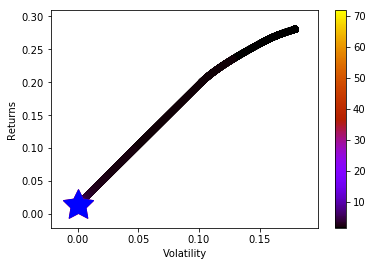

In [36]:
#Markowitz
plt.scatter(results_frame_optim_b.SD,results_frame_optim_b.Returns,c=results_frame_optim_b.Sharpe,cmap='gnuplot');
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#Sharpe Ratio
plt.scatter(max_sharpe_port_optim_b[1],max_sharpe_port_optim_b[0],marker=(5,1,0),color='r',s=1000);
#SD
plt.scatter(min_vol_port_optim_b[1],min_vol_port_optim_b[0],marker=(5,1,0),color='b',s=1000);


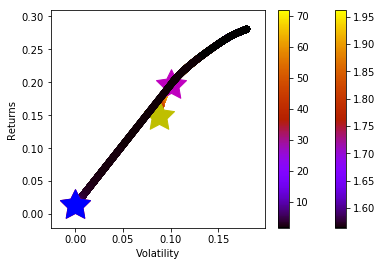

In [37]:
#Portafolio sin bonos
#Markowitz
plt.scatter(results_frame_optim.SD,results_frame_optim.Returns,c=results_frame_optim.Sharpe,cmap='gnuplot');
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#Sharpe Ratio
plt.scatter(max_sharpe_port_optim[1],max_sharpe_port_optim[0],marker=(5,1,0),color='m',s=1000);
#SD
plt.scatter(min_vol_port_optim[1],min_vol_port_optim[0],marker=(5,1,0),color='y',s=1000);

#Portafolio con bonos 
#Markowitz
plt.scatter(results_frame_optim_b.SD,results_frame_optim_b.Returns,c=results_frame_optim_b.Sharpe,cmap='gnuplot');
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#Sharpe Ratio
plt.scatter(max_sharpe_port_optim_b[1],max_sharpe_port_optim_b[0],marker=(5,1,0),color='r',s=1000);
#SD
plt.scatter(min_vol_port_optim_b[1],min_vol_port_optim_b[0],marker=(5,1,0),color='b',s=1000);


In [38]:
np.abs(results_frame_optim_b['SD']-max_sharpe_port_optim['SD']).idxmin()


4530

In [40]:
results_frame_optim_b.iloc[4530]

Returns    1.965e-01
SD         1.001e-01
Sharpe     1.963e+00
EDV        2.205e-01
IHI        3.372e-01
IVV        1.536e-01
IYF        1.010e-01
IYR        7.588e-03
REM        8.980e-05
VFH        1.639e-01
VHT        6.897e-07
VOX        1.544e-05
BOND       1.613e-02
Name: 4530, dtype: float64

## Cobertura

Escenario: 

En esta sección se implementarán estrategias de coberturas. Se usarán exclusivamente opciones vanillas las cuales son las más sencillas de Call y Put. 

En este caso se planea hacer especulación de mercado, no se busca el hacer coberturas solo especulación. 
Ahora bien, el commodity que se especulará será el petróleo. Después de haber recopilado información acerca de este commodity encontramos que el precio del petróleo ira al alza. Esto se concluye por varios artículos de noticias encontrados y también al observar los contratos a futuro del petróleo, estos incrementaron a partir de finales del mes de septiembre, en la gráfica se observa como el volumen de contratos de petróleo incremento exponencial. 
Nuestra estrategia se muestra a continuación. 


Spot = 51.42
rate = 1.05 (5 meses) 
vol = 30%
Conisderando que solo se puede utilizar combinación con vannillas:
Strap Option
Buy 2 ATM (At-The-Money) Call Options
Buy 1 ATM (At-The-Money) Put Option
Vencimiento Febrero 2018 



In [125]:
def call_payoff(ST, K):
    return max(0, ST-K)

def call_payoffs(STmin, STmax, K, step=1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(call_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [126]:
def put_payoff(ST, K):
    return max(0, K-ST)

def put_payoffs(STmin, STmax, K, step=1):
    maturities = np.arange(STmin, STmax+step, step)
    payoffs = np.vectorize(put_payoff)(maturities, K)
    df = pd.DataFrame({'Strike': K, 'Payoff': payoffs}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [127]:
def plot_pnl(pnl_df, okind, who):
    plt.ylim(pnl_df.Payoff.min() - 10, pnl_df.Payoff.max() + 10)
    plt.ylabel("Ganancia/pérdida")
    plt.xlabel("Precio de maduración")
    plt.title('Ganancia y pérdida de una opción {0} para el {1}, Prima={2}, Strike={3}'.format(okind, who, pnl_df.Prima.iloc[0],
    pnl_df.Strike.iloc[0]))
    plt.ylim(pnl_df.PnL.min()-3, pnl_df.PnL.max() + 3)
    plt.xlim(pnl_df.index[0], pnl_df.index[len(pnl_df.index)-1])
    plt.plot(pnl_df.index, pnl_df.PnL)
    plt.axhline(0, color='g');

In [128]:
def strap_option(pt_long, K_long, ct_long, K_long2, STmin, STmax, step = 1):
    import numpy as np
    import pandas as pd
    maturities = np.arange(STmin, STmax+step, step)
    payoffs_pl = np.vectorize(put_payoff)(maturities, K_long)
    payoffs_cl = np.vectorize(call_payoff)(maturities, K_long2)
    df = pd.DataFrame({'Strike': K_long, 'Payoff': payoffs_cl, 'Prima': -ct_long-pt_long, 'PnL': 2*(payoffs_cl-ct_long)+(payoffs_pl-pt_long)}, index=maturities)
    df.index.name = 'Precio de maduración'
    return df

In [130]:
strap_option(3.7366, 51.42, 3.7366, 51.42, 20, 100)

,Payoff,PnL,Prima,Strike
Precio de maduración,,,,
20,0,20.21,-7.473,51.42
21,0,19.21,-7.473,51.42
22,0,18.21,-7.473,51.42
23,0,17.21,-7.473,51.42
24,0,16.21,-7.473,51.42
25,0,15.21,-7.473,51.42
26,0,14.21,-7.473,51.42
27,0,13.21,-7.473,51.42
28,0,12.21,-7.473,51.42


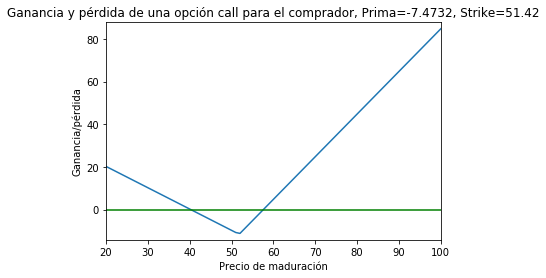

In [132]:
plot_pnl(strap_option(3.7366, 51.42, 3.7366, 51.42, 20, 100),"call", "comprador")